In [56]:
import numpy as np
from scipy import sparse
from PIL import Image

In [57]:
img = np.load("../practicas_AL/beltrami_adult.npy")
M = np.array(img)
print(M)
print(M.shape)
beltrami = Image.fromarray(M)
beltrami.show() #Se abre la imagen en una aplicación externa

[[244 238 236 ... 250 250 250]
 [252 243 237 ... 249 249 249]
 [243 232 226 ... 247 247 247]
 ...
 [177 174 169 ... 229 236 237]
 [178 176 172 ... 232 239 240]
 [187 185 180 ... 232 239 240]]
(228, 187)


[[244 252 243 ... 177 178 187]
 [238 243 232 ... 174 176 185]
 [236 237 226 ... 169 172 180]
 ...
 [250 249 247 ... 229 232 232]
 [250 249 247 ... 236 239 239]
 [250 249 247 ... 237 240 240]]


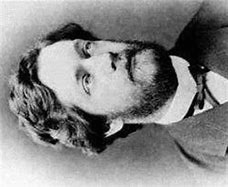

In [59]:
A = M.T
beltrami_girado = Image.fromarray(A)
print(A)
beltrami_girado

In [60]:
from scipy.linalg import svd

U, s, V = svd(A)

print(f"U = \n {U}")
print(f"s = \n {s}")
print(f"V^T = \n {V}")

# s contiene los valores singulares almacenados en un vector
# recuperamos la matriz Sigma:
Sigma = np.zeros((A.shape[0], A.shape[1]))
Sigma[:A.shape[0], :A.shape[0]] = np.diag(s)
print(f"Sigma = \n {Sigma}")

print(f"Forma de U = {U.shape}")
print(f"Forma de Sigma = {Sigma.shape}")
print(f"Forma de V^T = {V.shape}")

print(np.round(U.dot(Sigma.dot(V)))) 
# Coinciden 

U = 
 [[-0.10358145  0.02198968  0.0021542  ... -0.0759327  -0.00146994
  -0.0177579 ]
 [-0.09844697  0.01901818  0.00894816 ...  0.2003558   0.11289407
  -0.01032199]
 [-0.0951115   0.01812917  0.0152985  ... -0.22930472 -0.15069006
   0.02101575]
 ...
 [-0.11506867  0.03656439 -0.054218   ... -0.17008455  0.07608643
   0.3568638 ]
 [-0.1167452   0.03590726 -0.05989129 ...  0.11246515  0.08630929
   0.1140729 ]
 [-0.11755426  0.03489203 -0.06180156 ...  0.08784679 -0.13992873
  -0.44077307]]
s = 
 [2.90360137e+04 6.43121729e+03 4.94671436e+03 3.31388989e+03
 3.06087012e+03 2.37955493e+03 2.20238867e+03 2.06239624e+03
 1.82644055e+03 1.57029211e+03 1.49228857e+03 1.43501782e+03
 1.20715283e+03 1.13932983e+03 1.05540027e+03 9.43108887e+02
 9.08636475e+02 8.52814636e+02 7.68316284e+02 7.35891663e+02
 7.07713867e+02 6.87408569e+02 6.72966797e+02 6.49327820e+02
 6.45294250e+02 6.06358948e+02 5.83120300e+02 5.51309387e+02
 5.36725342e+02 4.96056213e+02 4.86290924e+02 4.80114044e+02
 4.57113

In [61]:
r = 50
U_r = np.array(U[:, :r])
print(f"Forma de U_r = {U_r.shape}")
Sigma_r = np.array(Sigma[:r, :r])
print(f"Forma de Sigma_r = {Sigma_r.shape}")
V_r = np.array(V[:r, :])
print(f"Forma de V_r = {V_r.shape}")

Forma de U_r = (187, 50)
Forma de Sigma_r = (50, 50)
Forma de V_r = (50, 228)


In [62]:
A_r = U_r.dot(Sigma_r.dot(V_r))
print(A_r.shape)

(187, 228)


In [63]:
M_r = A_r.T 
beltrami_compressed = Image.fromarray(M_r)
beltrami_compressed.show()

In [64]:
# No tener en cuenta a partir de aquí, era mera curiosidad y es cierto que se aprecia la diferencia entre las imagenes comprimidas.
r = 10
U_r = np.array(U[:, :r])
print(f"Forma de U_r = {U_r.shape}")
Sigma_r = np.array(Sigma[:r, :r])
print(f"Forma de Sigma_r = {Sigma_r.shape}")
V_r = np.array(V[:r, :])
print(f"Forma de V_r = {V_r.shape}")

Forma de U_r = (187, 10)
Forma de Sigma_r = (10, 10)
Forma de V_r = (10, 228)


In [65]:
A_r = U_r.dot(Sigma_r.dot(V_r))
print(A_r.shape)

(187, 228)


In [66]:
M_r = A_r.T 
beltrami_compressed = Image.fromarray(M_r)
beltrami_compressed.show() #De nuevo se abre en una aplicación externa